## Text classification on LeMonde2003 Dataset

In this notebook, we
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*.

The data are here : https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz

Download it into the data directory :

```
wget https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ?
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt



In [7]:
import pandas as pd

# load dataframe from CSV file
df = pd.read_csv('/LeMonde2003_9classes.csv')
df


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT
...,...,...
30160,reçu à la mairie de biarritz à l'occasion d'un...,FRA
30161,la française malia metella a remporté le titre...,SPO
30162,1 pourquoi avoir choisi les années 1950 pour k...,ART
30163,la croix a licencié un journaliste alain herto...,ENT


<Axes: xlabel='count', ylabel='category'>

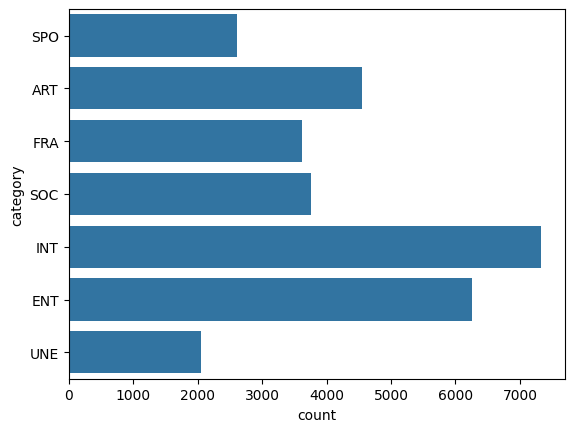

In [8]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df,y='category')

In [12]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
df.sample(n=5)


,text,category
29016,gaston maulin 72 ans est le père noël de cette saison en maurienne le 20 décembre il a fait aboutir son projet d'unir six stations de ski de ce massif de savoie pour en faire le quatrième domaine skiable français baptisé les sybelles grâce à la mise en service d'un télésiège de liaison de six places c'était le dernier maillon d'un programme d'investissements de 30 millions d'euros commencé en 1997 pour relier les 310 km de pistes et les 73 remontées mécaniques des stations savoyardes de saint-jean-d'arves de saint-sorlin-d'arves du corbier de la toussuire des bottières et de saint-colomban-des-villards depuis que cet ancien mitron a quitté la boulangerie familiale de grenoble pour fonder sa première entreprise à 24 ans il n'a cessé de découvrir de nouveaux métiers dix-sept au total énonce-t-il en souriant mais il m'est arrivé aussi de me planter précise-t-il aujourd'hui gaston comme l'appellent ses amis qu'il adore réunir autour d'une bonne table est à la tête de plusieurs sociétés de remontées mécaniques en maurienne mais aussi de la financière maulin une holding de la tour-du-pin isère engagée aussi bien dans la fabrication de chocolats que dans les transports les meubles les constructions métalliques l'hôtellerie l'immobilier c'est la réussite de la chocolaterie du cheval blanc créée en 1976 et valeur vedette de la bourse de lyon dans les années 1980 revendue depuis qui a assuré sa notoriété je ne suis pas attaché aux choses dit-il si quelqu'un me sollicite je peux m'engager à ses côtés sur un coup de tête et si la personne n'est pas capable je continue tout seul j'ai toujours une chocolaterie mais elle est en belgique six stations reliées fan de rugby m. maulin a présidé le grand club isérois de bourgoin-jallieu il n'a découvert le ski qu'en 1976 à 45 ans grâce à sa seconde épouse originaire du corbier en maurienne comme je distribuais des chocolats et que je payais à boire à tout le monde je suis devenu populaire dans le pays raconte-t-il en rigolant en 1995 il reprend la société gestionnaire des remontées mécaniques du corbier de saint-jean-d'arves et de saint-colomban qui périclite quatre ans plus tard il achète celle voisine de saint-sorlin-d'arves tout le monde rêvait d'un vaste domaine skiable on a imaginé de relier six belles stations les sybelles sont nées depuis trois ans m. maulin a investi plus de 75 millions d'euros dans les remontées les canons à neige et l'immobilier quand j'ai pris les remontées le chiffre d'affaires avoisinait 7 millions d'euros aujourd'hui on est à 12 millions et il faudrait qu'on en fasse 18 pour pouvoir fonctionner correctement c'est bien beau d'investir mais il faut pouvoir rembourser les emprunts j'ai dû me lancer dans l'immobilier j'ai fait 4 000 lits et je compte en faire encore autant,ENT
2680,sanctions george w. bush a déclaré mercredi 16 avril à detroit que le régime de saddam hussein est passé dans l'histoire le président américain affirme un droit à l'ingérence politique pour les etats-unis maintenant que le peuple irakien est libéré les nations unies devraient lever les sanctions économiques contre l'irak a-t-il par ailleurs déclaré un porte-parole de la maison-blanche a indiqué que les etats-unis allaient bientôt proposer une résolution dans le but de mettre un terme au programme pétrole contre nourriture une majorité des membres du conseil de sécurité ne semble pas prête à lever les sanctions sans conditions tommy franks le commandant de la coalition américano-britannique s'est rendu à bagdad pour la première fois depuis le début de la guerre devant des journalistes il a reconnu qu'il y avait toujours des combats en irak depuis l'un des palais de saddam hussein reconverti en centre militaire américain il s'est entretenu par téléconférence et à huis clos avec m. bush le général william wallace commandant des forces terrestres américaines a annoncé le rapatriement d'une partie du contingent américain mais le maintien du gros de la troupe pour remettre de l'

WorldCloud for category ENT


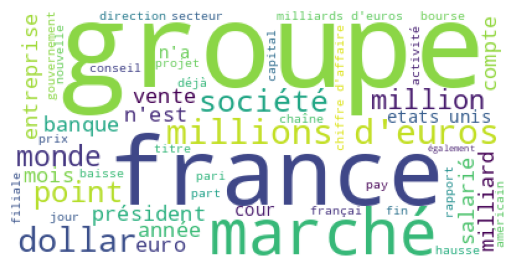

WorldCloud for category INT


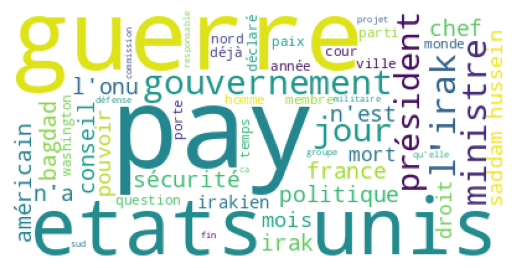

WorldCloud for category ART


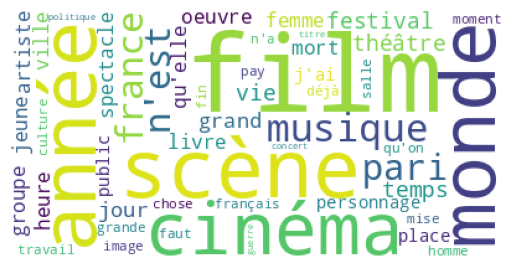

WorldCloud for category SOC


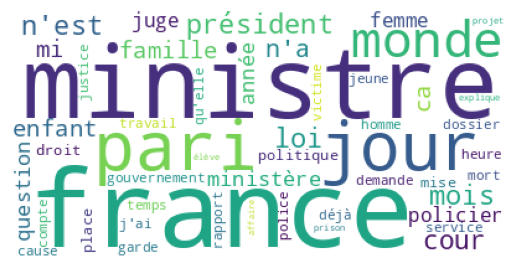

WorldCloud for category FRA


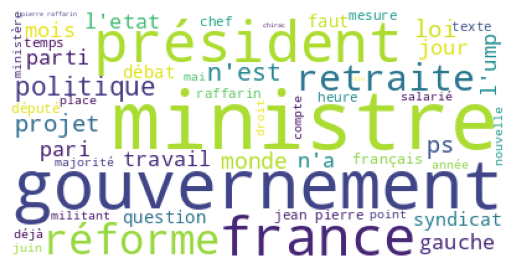

In [24]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
  print(f"WorldCloud for category {cat}")
  wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 50).generate(df[df['category']==cat]['text'].to_string())
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show();

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple :

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words :

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words.
> * Train a naive bayes classifier on the data.
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [44]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
X = df['text']
y = df['category']

X_train, X_dev_test, y_train, y_dev_test, = train_test_split(X, y, train_size=0.8, test_size=0.2)
X_test, X_dev, y_test, y_dev = train_test_split(X_dev_test, y_dev_test, train_size=0.5)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors

vectorizer = CountVectorizer(max_features=1000)
# create the vectorizer object

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
print(X_train_counts)
X_dev_counts = vectorizer.transform(X_dev)
print(X_dev_counts)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2508041 stored elements and shape (24132, 1000)>
  Coords	Values
  (0, 4)	1
  (0, 9)	1
  (0, 12)	1
  (0, 15)	2
  (0, 17)	1
  (0, 20)	1
  (0, 21)	3
  (0, 22)	2
  (0, 25)	1
  (0, 45)	2
  (0, 52)	1
  (0, 53)	3
  (0, 54)	2
  (0, 61)	1
  (0, 62)	1
  (0, 66)	1
  (0, 69)	5
  (0, 73)	1
  (0, 74)	4
  (0, 75)	1
  (0, 76)	2
  (0, 77)	1
  (0, 78)	5
  (0, 79)	3
  (0, 85)	1
  :	:
  (24130, 961)	1
  (24130, 970)	1
  (24130, 979)	1
  (24130, 996)	1
  (24130, 999)	1
  (24131, 10)	1
  (24131, 23)	1
  (24131, 111)	1
  (24131, 140)	1
  (24131, 240)	2
  (24131, 249)	3
  (24131, 295)	1
  (24131, 320)	1
  (24131, 400)	1
  (24131, 431)	1
  (24131, 475)	1
  (24131, 480)	1
  (24131, 482)	1
  (24131, 518)	1
  (24131, 525)	1
  (24131, 619)	1
  (24131, 628)	1
  (24131, 742)	1
  (24131, 883)	1
  (24131, 933)	1
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 308379 stored elements and shape (3017, 1000)>
  Coords	Values
  (0, 6)	1
  (0, 22)	1
  

In [59]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier

# create the MultinomialNB
clf = MultinomialNB()

# Train
clf.fit(X_train_counts, y_train)

# Evaluate
clf.score(X_dev_counts, y_dev)

0.7258866423599603

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)

**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

clf = MultinomialNB()
clf.fit(X_train_tf, y_train)
clf.score(X_dev_tf, y_dev)

0.7408021213125622

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used :

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.82      0.80      0.81       451
         ENT       0.70      0.87      0.77       630
         FRA       0.67      0.70      0.69       387
         INT       0.74      0.88      0.80       703
         SOC       0.64      0.58      0.61       344
         SPO       0.91      0.77      0.84       289
         UNE       0.75      0.01      0.03       213

    accuracy                           0.74      3017
   macro avg       0.75      0.66      0.65      3017
weighted avg       0.74      0.74      0.71      3017



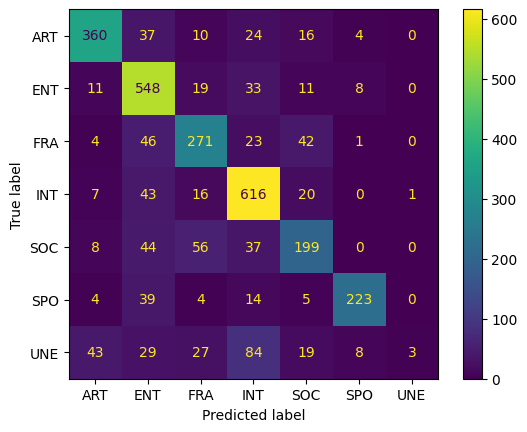

In [62]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_dev, clf.predict(X_dev_tf)))
print(ConfusionMatrixDisplay.from_estimator(clf, X_dev_tf, y_dev))



## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


# Classification using sentence embeddings

Word embeddings were initially developed to calculate dense vector representations of words that encode syntax and semantics. Word embedding such as BERT can be extended and trained to encode the semantic meaning of sentences or short paragraphs. These models are trained using pairs of similar, neutral or contradictory sentences using a [Siamese neural network](https://en.wikipedia.org/wiki/Siamese_neural_network). The model is optimised to minimise the distance between the embeddings of similar sentences and maximise the distance between the embeddings of contradictory sentences. Once trained, these models can be used to encode documents of variable (but bounded) length into fixed-length embeddings.


In this section, we will use sentence embeddings to encode Le Monde articles and classify them with a simple Multi-layer Perceptron classifier. The [sentence-transformers library](https://www.sbert.net/index.html) makes it easy to encode documents into embeddings: https://www.sbert.net/examples/sentence_transformer/applications/computing-embeddings/README.html
The [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) model allows texts in different languages with a maximum length of 128 tokens to be encoded into a single 384-dimensional embedding vector.

Your task is to
- load the paraphrase-multilingual-MiniLM-L12-v2 model
- merge the previous train and dev (into train_dev) sets because the MLP classifier uses part of the train set for [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
- encode the train_dev and test texts with the embeddings model
- encode the targets of the train_dev and test sets. This encoding is needed because the MLP classifier does not handle string labels.
- define an [MLP classifier from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- train the classifier on train_dev
- evaluate the classifier on test
- compare the results with the previous classifier







In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

MODEL_NAME = 'paraphrase-multilingual-MiniLM-L12-v2'
# load the model


# combine train and dev


# encode train_dev and test sets


# encode the targets


# define the MLP


# train the classifier

# evaluate the classifier


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification).

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model
* start testing with a small number of articles and the first 100's of characters for faster experiments.